# CS5002: Programming Principles and Practice

## Practical P3: Data analysis and visualisation Python

The primary objective of this practical is to apply programming principles to a real-world dataset, demonstrating data loading, validation, refinement, and exploratory analysis. Specifically, this report utilises pandas for data manipulation and cleaning, and Matplotlib for generating visualisations.

To begin, the data from the census, and the corresponding data dictionary are loaded in using the functions `load_data` and `load_dictionary` from the `refine_data.py` script. The data is then refined using the `refine` function, and this refined data is outputted to a new csv file using the `save_refined_data` function. This step can be performed in the terminal by calling the `refine_data.py` script and specifying the necessary arguments, but can also be performed in the notebook as shown below.

The `load_data` function prints the total number of records in the dataset and the type of each variable in the dataset.

In [1]:
from pathlib import Path
import sys

# Since the code is in a different folder to the notebooks, 
# first need to ensure the code directory is on the system path 
# otherwise cannot find the refine_data script for importing functions
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
code_dir = project_root / "code"

# Add the specific 'code' directory to the system path
sys.path.append(str(code_dir))

# Ensure the project root is on the path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


# Import the script
import refine_data as rd

raw_csv = Path("../data/census-2021-public-microdata-teaching-sample.csv")
df_raw = rd.load_data(raw_csv)

dict_json = Path("../data/data_dictionary.json")
data_dict = rd.load_dictionary(dict_json)

Loading CSV: ..\data\census-2021-public-microdata-teaching-sample.csv
Successfully loaded 16894 records.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SerialNum                    16894 non-null  int64
 1   AGE_BAND_AGG8                16894 non-null  int64
 2   COB_AGG3                     16894 non-null  int64
 3   ECONOMIC_ACTIVITY_10M        16894 non-null  int64
 4   ETHNIC_GROUP_AGG2            16894 non-null  int64
 5   HEALTH_IN_GENERAL            16894 non-null  int64
 6   FAMILY_TYPE                  16894 non-null  int64
 7   HH_SOCGRADE4                 16894 non-null  int64
 8   HOURS_PER_WEEK_WORKED        16894 non-null  int64
 9   IN_FULL_TIME_EDUCATION       16894 non-null  int64
 10  INDUSTRY_CURRENT_10A         16894 non-null  int64
 11  LEGAL_PARTNERSHIP_STATUS_6A  16894 non-null  int64
 1

Can see that the dataframe contains 16894 records, as expected, and there is no missing data values or any types other than integers, so we can expect not much refinement to occur.

In [2]:
df_refined = rd.refine(df_raw, data_dict)
# can then save the refined data to a new csv file, 
# however since this file has already been created from the terminal I wont proceed with this step
#output_csv = Path("../data/refined_data.csv")
#refine_data.save_refined_data(df_refined, output_csv)

No duplicate records found.
Checking column: AGE_BAND_AGG8
Checking column: COB_AGG3
Checking column: ECONOMIC_ACTIVITY_10M
Checking column: ETHNIC_GROUP_AGG2
Checking column: HEALTH_IN_GENERAL
Checking column: FAMILY_TYPE
Checking column: HH_SOCGRADE4
Checking column: HOURS_PER_WEEK_WORKED
Checking column: IN_FULL_TIME_EDUCATION
Checking column: INDUSTRY_CURRENT_10A
Checking column: LEGAL_PARTNERSHIP_STATUS_6A
Checking column: OCCUPATION_CURRENT_1DIGIT
Checking column: RELIGION_BELONG_TO
Checking column: RELIGION_BROUGHT_UP_IN
Checking column: SEX
Checking column: UR_RESIDENCE_TYPE
No further inconsistencies found.
Refinement complete. Final record count: 16894


### Data analysis and visualisation
Once the data has been refined, it can be analysed.

In [3]:
# Import the script
import refine_data as rd

# load in the refined data frame
refined_csv = Path("../data/refined_data.csv")
df_refined = rd.load_data(refined_csv)

Loading CSV: ..\data\refined_data.csv
Successfully loaded 16894 records.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SerialNum                    16894 non-null  int64
 1   AGE_BAND_AGG8                16894 non-null  int64
 2   COB_AGG3                     16894 non-null  int64
 3   ECONOMIC_ACTIVITY_10M        16894 non-null  int64
 4   ETHNIC_GROUP_AGG2            16894 non-null  int64
 5   HEALTH_IN_GENERAL            16894 non-null  int64
 6   FAMILY_TYPE                  16894 non-null  int64
 7   HH_SOCGRADE4                 16894 non-null  int64
 8   HOURS_PER_WEEK_WORKED        16894 non-null  int64
 9   IN_FULL_TIME_EDUCATION       16894 non-null  int64
 10  INDUSTRY_CURRENT_10A         16894 non-null  int64
 11  LEGAL_PARTNERSHIP_STATUS_6A  16894 non-null  int64
 12  OCCUPATION_CURRENT_1DIGIT    

Descriptive analysis: Finding and printing all the different values that each variable takes, and the number of occurrences for each value.

In [4]:
# start by importing the necessary libraries needed for the data analysis and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Iterate through every column in the refined data frame except for SerialNum
for column in df_refined.columns:
    if column == 'SerialNum':
        continue

    # use the functions to retrieve the mapping and get the labelled data
    code_mapping = rd.mapping_from_dict(column, data_dict)
    labels, counts = rd.get_labels_and_counts(df_refined, column, code_mapping)

    print(f"Variable: {column} ")

    # summary data frame for nice printing
    analysis_df = pd.DataFrame({
        'Label': labels,
        'Count': counts
    })
    
    # Display the results using the Markdown format 
    print(analysis_df.to_markdown(numalign="left", stralign="left"))


Variable: AGE_BAND_AGG8 
|    | Label       | Count   |
|:---|:------------|:--------|
| 0  | 0-15 years  | 3555    |
| 1  | 16-24 years | 1685    |
| 2  | 25-34 years | 2070    |
| 3  | 35-44 years | 2252    |
| 4  | 45-54 years | 2295    |
| 5  | 55-64 years | 2192    |
| 6  | 65-74 years | 1584    |
| 7  | 75+ years   | 1261    |
Variable: COB_AGG3 
|    | Label                                          | Count   |
|:---|:-----------------------------------------------|:--------|
| 0  | Northern Ireland                               | 14675   |
| 1  | Rest of United Kingdom and Republic of Ireland | 1101    |
| 2  | Other                                          | 1118    |
Variable: ECONOMIC_ACTIVITY_10M 
|    | Label                                                             | Count   |
|:---|:------------------------------------------------------------------|:--------|
| 0  | Does not apply                                                    | 3555    |
| 1  | Economically active 

Bar charts showing the number records for different categories

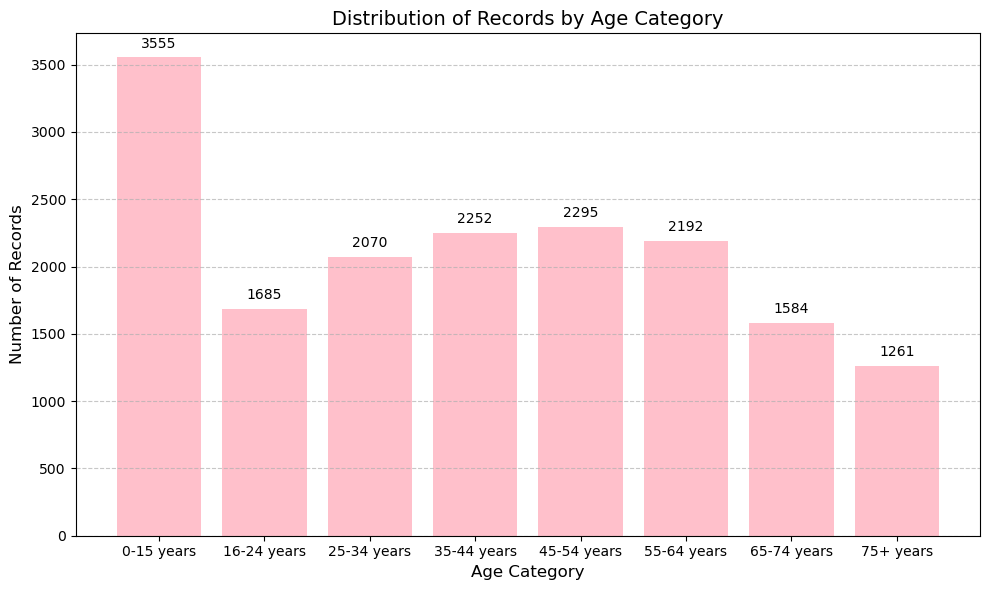

In [7]:
# Age category
AGE_COL = 'AGE_BAND_AGG8'

# use the functions to retrieve the mapping and get the labelled data
age_mapping = rd.mapping_from_dict(AGE_COL, data_dict)
age_labels, age_counts = rd.get_labels_and_counts(df_refined, AGE_COL, age_mapping)

# set up plot
plt.figure(figsize=(10, 6))
bars = plt.bar(age_labels, age_counts, color='pink')

plt.title('Distribution of Records by Age Category', fontsize=14)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# For better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # prevent label cutoff

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom', fontsize=10)

plt.show()

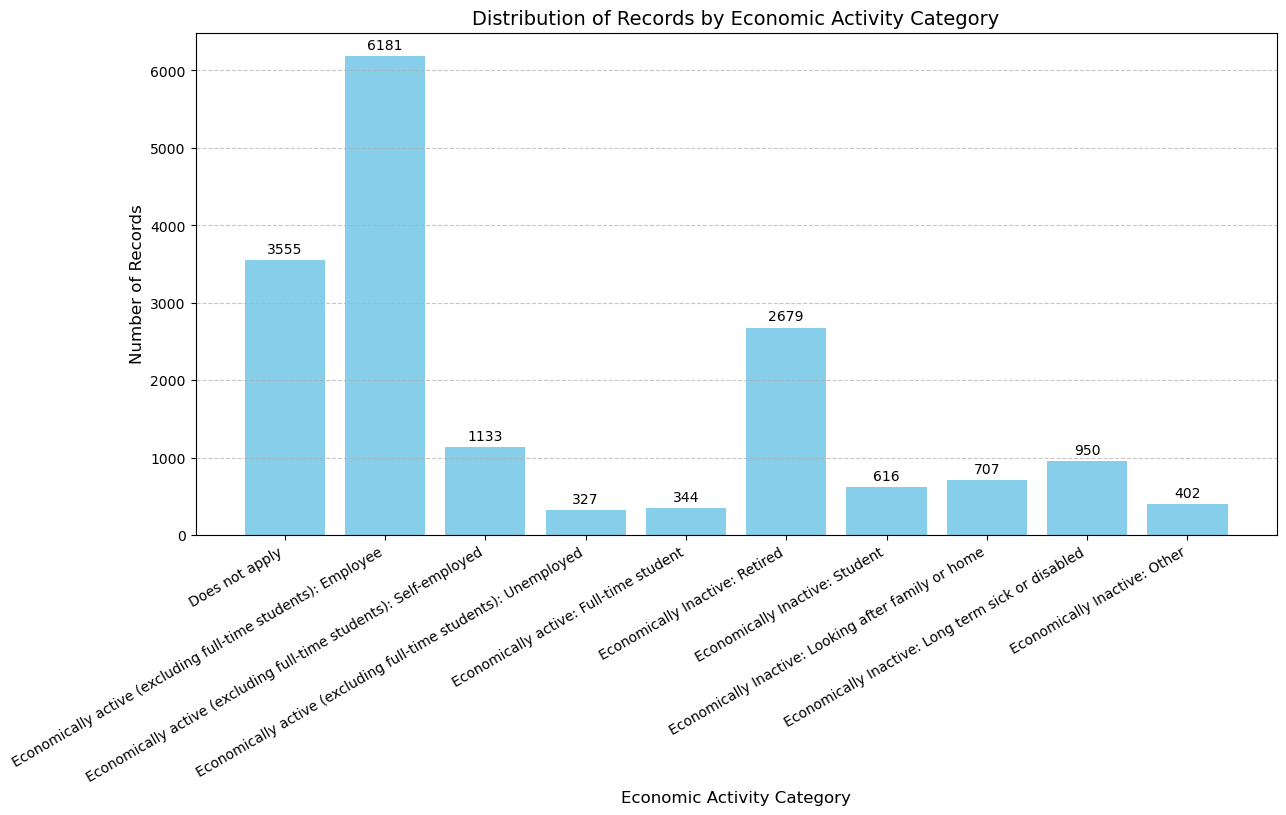

In [ ]:
# Economic activity category
ECON_COL = 'ECONOMIC_ACTIVITY_10M'

# use the functions to retrieve the mapping and get the labelled data
econ_mapping = rd.mapping_from_dict(ECON_COL, data_dict)
econ_labels, econ_counts = rd.get_labels_and_counts(df_refined, ECON_COL, econ_mapping)

# set up plot
plt.figure(figsize=(12, 6))
bars = plt.bar(econ_labels, econ_counts, color='skyblue')

plt.title('Distribution of Records by Economic Activity Category', fontsize=14)
plt.xlabel('Economic Activity Category', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)

# For better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # prevent label cutoff
# Rotate labels for better readability, since these are long strings
plt.xticks(rotation=30, ha='right')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom', fontsize=10)

plt.show()

### Additional requirements
 Easy: pie charts for the percentage of records in different categories 

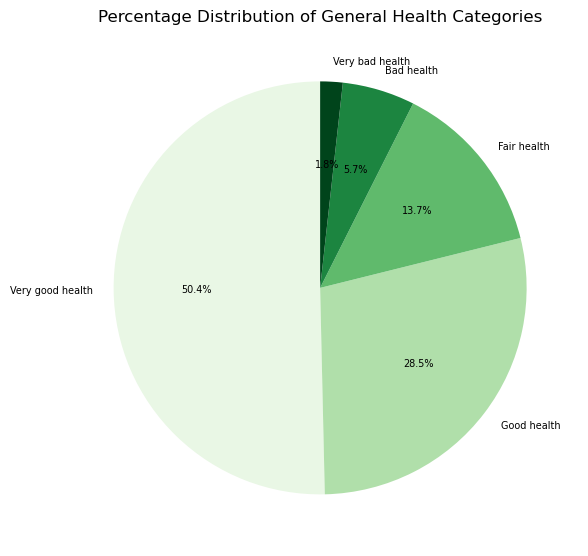

In [ ]:
# Use the functions to retrieve the mapping and get the labelled data
column_name_health = 'HEALTH_IN_GENERAL'
health_mapping = rd.mapping_from_dict(column_name_health, data_dict)
health_labels, health_counts = rd.get_labels_and_counts(df_refined, column_name_health, health_mapping)

green_shades = plt.cm.Greens(np.linspace(0.1, 1.0, len(health_labels)))
# set up plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    health_counts,         
    autopct='%1.1f%%',    # Display percentage with 1dp
    startangle=90,
    textprops={'fontsize': 7, 'color': 'black'},
    colors=green_shades # custom colors
)
plt.title(f'Percentage Distribution of General Health Categories')

plt.legend(
    wedges,             
    health_labels,      
    title="Health Category",
    loc="center left",  
    bbox_to_anchor=(1, 0, 0.5, 1), # Anchor the legend outside the plot area
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

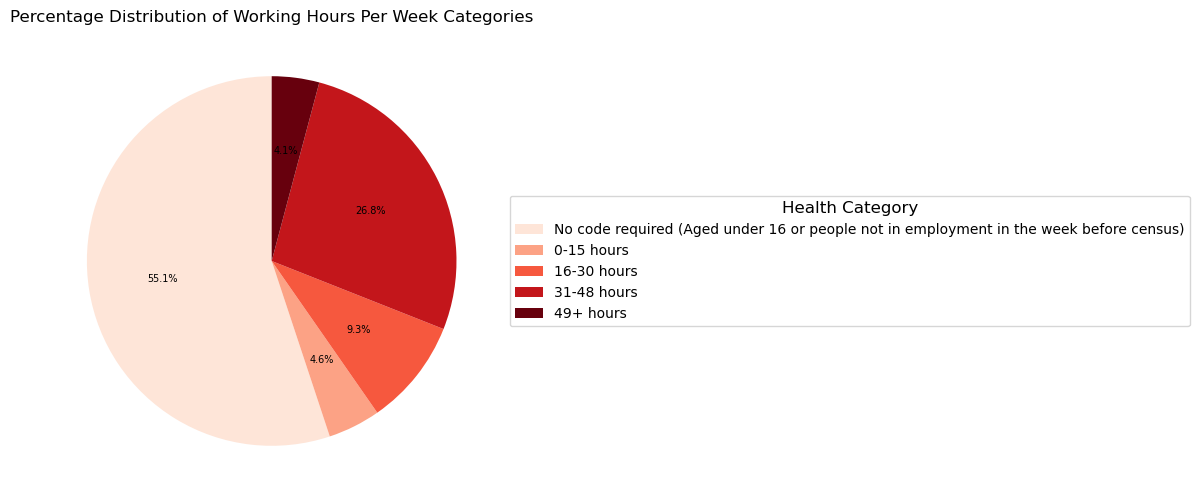

In [50]:
# Working hours per week category
# Use the functions to retrieve the mapping and get the labelled data
column_name_hours = 'HOURS_PER_WEEK_WORKED'
hours_mapping = rd.mapping_from_dict(column_name_hours, data_dict)
hours_labels, hours_counts = rd.get_labels_and_counts(df_refined, column_name_hours, hours_mapping)

red_shades = plt.cm.Reds(np.linspace(0.1, 1.0, len(hours_labels)))

# set up plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    hours_counts,         
    autopct='%1.1f%%',    # Display percentage with 1dp
    startangle=90,
    textprops={'fontsize': 7, 'color': 'black'},
    colors=red_shades    # Custom colors
)
plt.title(f'Percentage Distribution of Working Hours Per Week Categories')

plt.legend(
    wedges,             
    hours_labels,      
    title="Health Category",
    loc="center left",  
    bbox_to_anchor=(1, 0, 0.5, 1), # Anchor the legend outside the plot area
    fontsize=10,
    title_fontsize=12
)
#plt.tight_layout()
plt.show()